# 6.6

In [1]:
# Import Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Making a path.
path = r'/Users/terencekeys/Downloads/Shawzz Folder/Data Analytics Immersion Files/Achievement 6 Data Sets/Chocolate Data Sets'

In [3]:
# Importing chocolate ratings cleaned 1 data set.
choc_ratg_clnd1 = pd.read_csv(os.path.join(path, 'Changed', 'chocolate_ratings_cleaned1.csv'), index_col=0) 

In [4]:
choc_ratg_clnd1.dtypes

REF                                   int64
Company (Manufacturer)               object
Company Location                     object
Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                       float64
Ingredients                          object
Most Memorable Characteristics       object
Rating                              float64
Region                               object
Num_of_Ingredients                    int64
dtype: object

In [5]:
# Sorting the dataframe by the column 'REF' in ascending order.
choc_ratg_REF_clnd = choc_ratg_clnd1.sort_values("REF")

In [6]:
choc_ratg_REF_clnd

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Region,Num_of_Ingredients
1235,5,Jacque Torres,United States,2006,Ghana,Trinatario Treasure,71.0,5.0,"gritty, unrefined, off notes",2.00,Other,5
1085,15,Guittard,United States,2006,Colombia,Chucuri,65.0,5.0,"creamy, sweet, floral, vanilla",3.00,Other,5
1071,15,Green & Black's (ICAM),United Kingdom,2006,Blend,Dark,70.0,5.0,"mildly rich, basic, roasty",2.50,Other,5
1677,15,Neuhaus (Callebaut),Belgium,2006,Sao Tome,Sao Tome,75.0,5.0,"grassy, earthy, burnt",2.75,Other,5
1676,15,Neuhaus (Callebaut),Belgium,2006,Blend,West Africa,73.0,5.0,"non descript, poor aftertaste",2.00,Other,5
...,...,...,...,...,...,...,...,...,...,...,...,...
989,2708,Fresco,United States,2021,Peru,"Lamas, Oro Verde, #282, DR MC, batch 21-451",74.0,3.0,"spicey, herbal, ripe, sl. burnt",3.25,Other,3
987,2708,Fresco,United States,2021,Peru,"Lamas, Oro Verde, #280, MR 0C, batch 21-457",74.0,3.0,"licorice, caramel, floral, dirty",3.00,Other,3
1281,2708,Kasama,Canada,2021,Papua New Guinea,"Karkar Island, Madong, batch 34",70.0,3.0,"plum, molasses",3.50,Other,3
923,2712,Fossa,Singapore,2021,Malaysia,"Semai Community, Kamping Long B, Pahang",72.0,2.0,"dairy, cocoa, mild sour",3.50,Other,2


### 3. Make a subset of your data set if necessary. 

In [7]:
# Filtering subset by 70% cocoa.
choc_70 = choc_ratg_REF_clnd[choc_ratg_REF_clnd['Cocoa Percent']==70.0]
choc_70.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Region,Num_of_Ingredients
1071,15,Green & Black's (ICAM),United Kingdom,2006,Blend,Dark,70.0,5.0,"mildly rich, basic, roasty",2.50,Other,5
2039,15,Scharffen Berger,United States,2006,Blend,Bittersweet,70.0,5.0,"cherry, mild bitter",3.50,Other,5
1577,24,Michel Cluizel,France,2006,Sao Tome,Tamarina,70.0,4.0,"creamy, licorice, herbs",3.00,Other,4
836,32,El Rey,Venezuela,2006,Venezuela,"Carenero Superior, Gran Saman",70.0,5.0,"gritty, chalky, earthy, sour",2.75,Other,5
2031,32,Santander (Compania Nacional),Colombia,2006,Colombia,Colombian Dark,70.0,5.0,"rustic, cherry, marshmallow",3.75,Other,5


In [8]:
# Aggregating dataframe to get the mean of the ratings for each year.
choc_result = choc_70.groupby('Review Date')['Rating'].aggregate('mean')
choc_result

Review Date
2006    2.791667
2007    3.387500
2008    3.116071
2009    3.219697
2010    3.086957
2011    3.287234
2012    3.271875
2013    3.253425
2014    3.308081
2015    3.305147
2016    3.302083
2017    3.365385
2018    3.232422
2019    3.146341
2020    3.255000
2021    3.339080
Name: Rating, dtype: float64

In [9]:
choc_result = pd.DataFrame(choc_result, columns=['Rating'])
choc_result.head()

,Rating
Review Date,
2006,2.791667
2007,3.387500
2008,3.116071
2009,3.219697
2010,3.086957


In [10]:
# Exporting choc_result.
choc_result.to_csv(os.path.join(path, 'Changed', 'choc_result6.6.csv'))

In [11]:
choc_result.index

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='Review Date')

#### In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.

I chose the columns Review Date and Ratings because those were the only columns that I thought would show the results the best of the ratings per year.

#### Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

### 4. Create a line chart of your data.

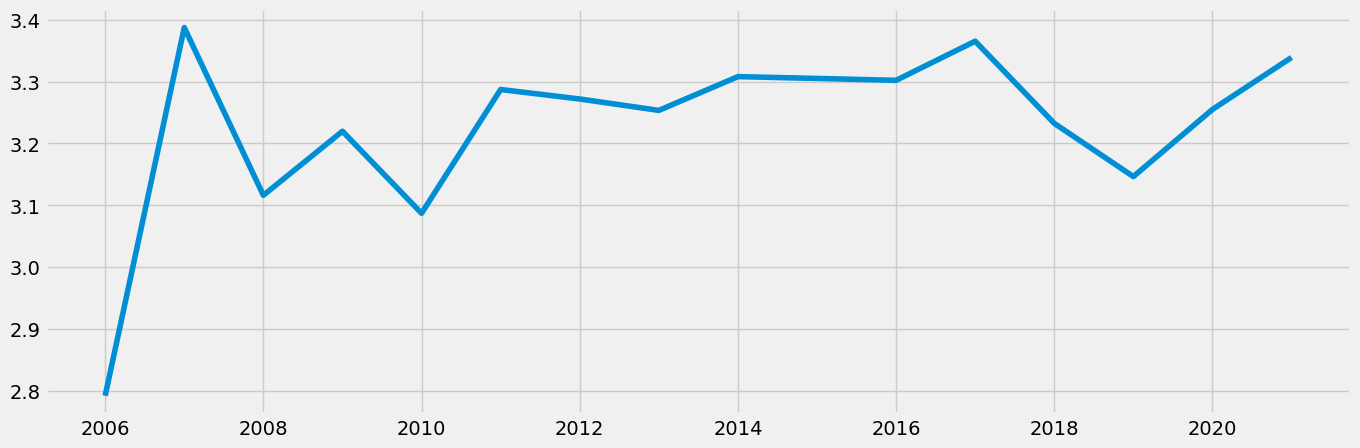

In [12]:
# The dpi argument controls the quality of the visualization here. When it's set to 100, it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!
plt.figure(figsize=(15,5), dpi=100)
# Plot the data using matplotlib.
plt.plot(choc_result)

### 5. Decompose the data’s components.

In [13]:
# Decomposing the time series using a multiplicative model.
decomposition = sm.tsa.seasonal_decompose(choc_result, model='multiplicative', period=1)

In [14]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

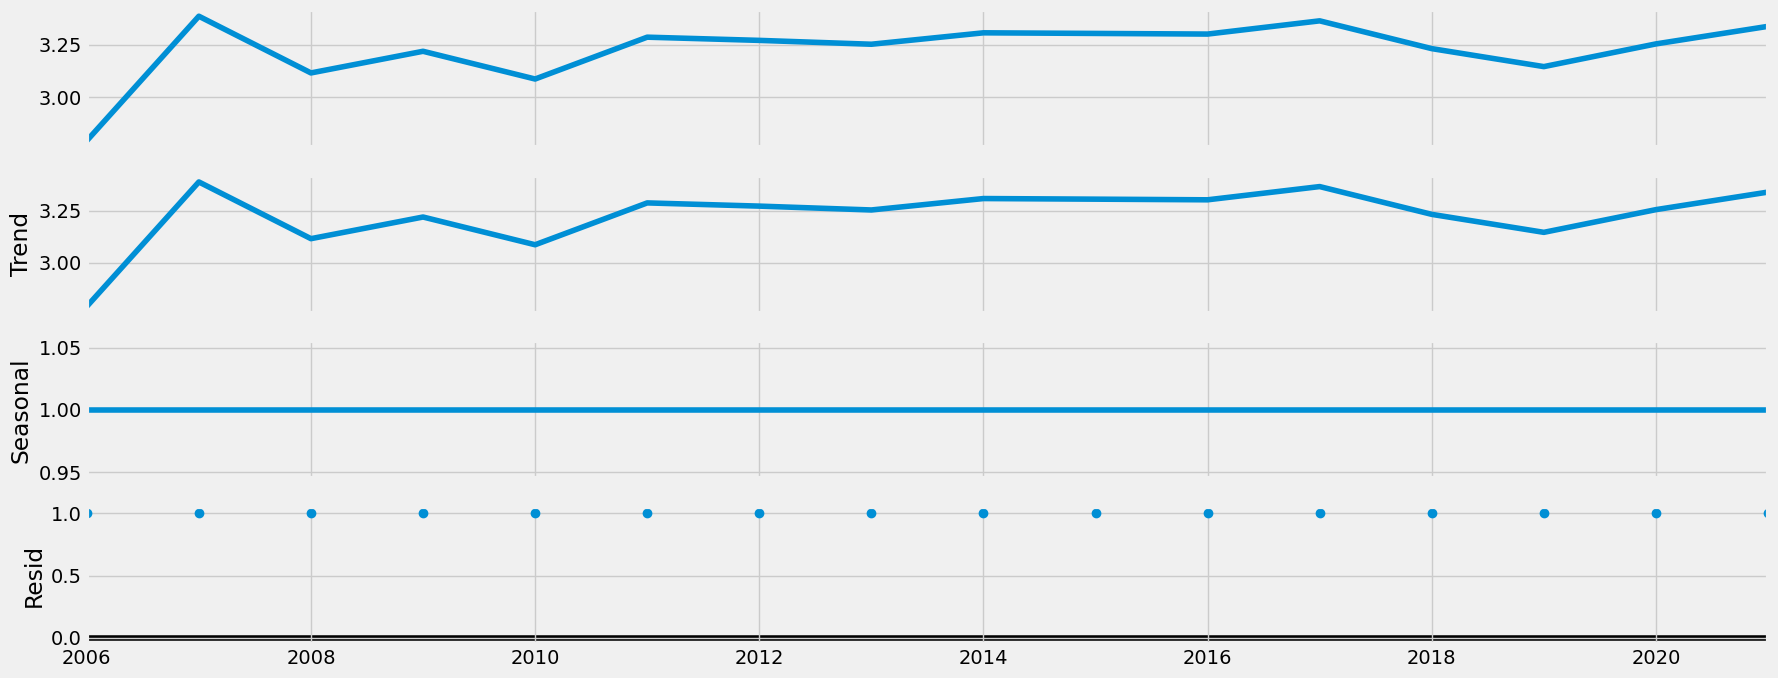

In [15]:
# Plot the separate components

decomposition.plot()
plt.show()

### 6. Conduct a Dickey-Fuller test to check for stationarity.


In [16]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return an array of numbers. This is why you need to also define a function that prints the correct output from that array.

# Import the adfuller() function.
from statsmodels.tsa.stattools import adfuller

# Define the function.
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(choc_result)

Dickey-Fuller Stationarity test:
Test Statistic                -2.847694
p-value                        0.051777
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


#### Interpret the results in a markdown cell and reference your null hypothesis.

The p-value, which indicates whether the test result is significant. A “significant” result would be a p-value of less than 0.05.

My p-value is 0.04 which is less than 0.05, which also means it is significant.

In order to determine the results of a statistical hypothesis test, you need to compare the test statistic to the critical value of the corresponding significance level. Below are criterias for whether I can or can't:
- Test statistic larger than critical value = can’t reject null hypothesis.
- Test statistic smaller than critical value = can reject null hypothesis.

For critical value (1%), my test statistic is larger than my critical value (1%).

For critical value (5%), my test statistic is larger than my critical value (5%)

For critical value (10%), my test statistic is smaller than my critical value (10%).

I need to perform differencing.

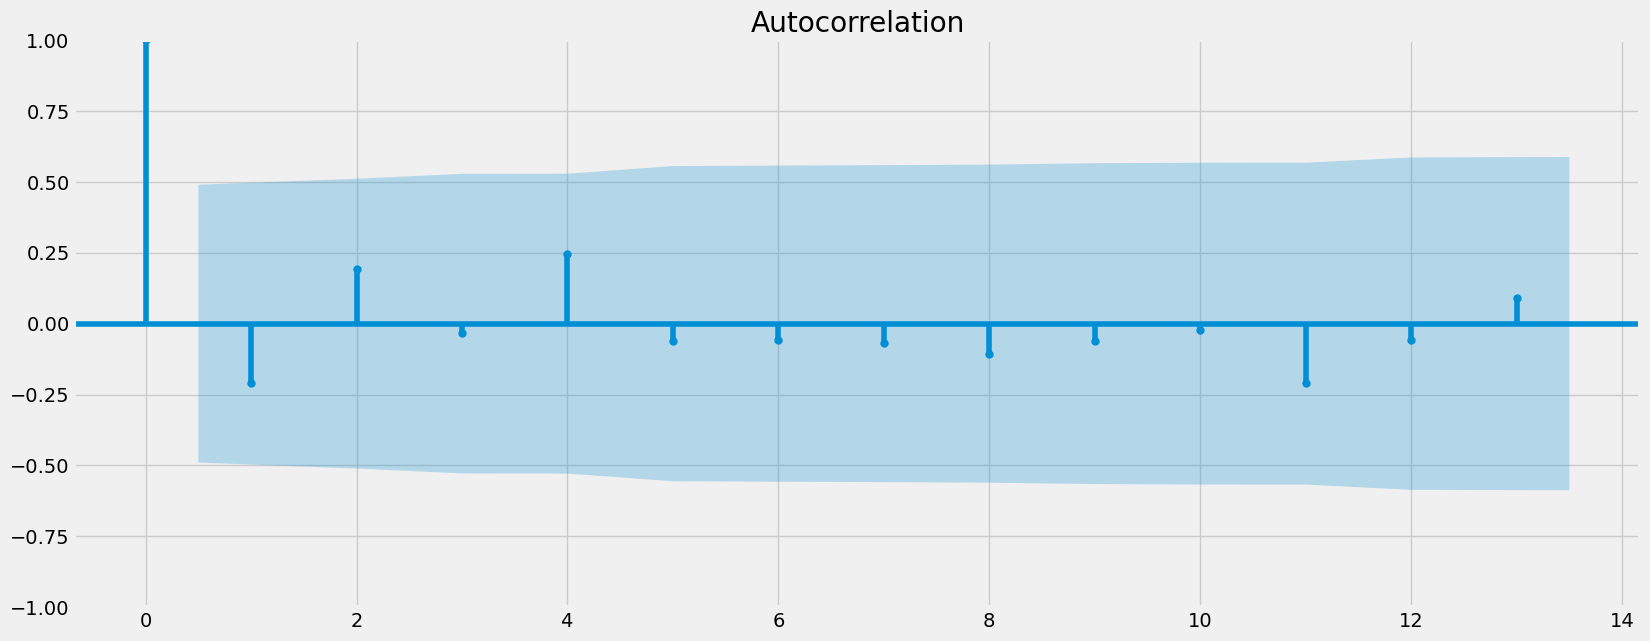

In [17]:
# Autocorrelations of the first Dickey-Fuller Stationarity Test.

# Here, you import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(choc_result)
plt.show()

### 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [18]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1).
choc_result_diff1 = choc_result - choc_result.shift(1) 

In [19]:
# Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.
choc_result_diff1.dropna(inplace = True)

In [20]:
choc_result_diff1

,Rating
Review Date,
2007,0.595833
2008,-0.271429
2009,0.103626
2010,-0.132740
2011,0.200278
2012,-0.015359
2013,-0.018450
2014,0.054656
2015,-0.002934


In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return an array of numbers. This is why you need to also define a function that prints the correct output from that array.

# Import the adfuller() function.
from statsmodels.tsa.stattools import adfuller

# Define the function.
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(choc_result_diff1)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.702877
p-value                         0.073542
Number of Lags Used             1.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


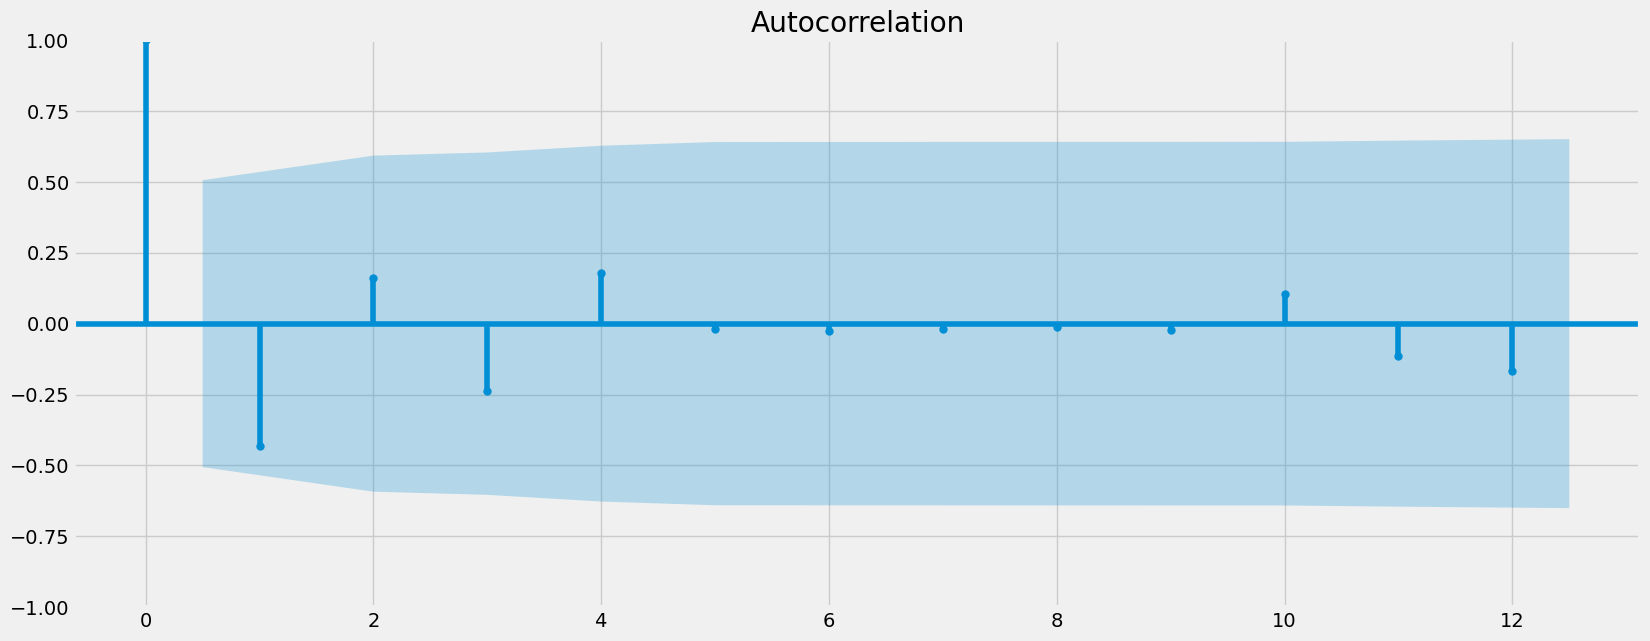

In [22]:
# Autocorrelations of the second Dickey-Fuller Stationarity Test.

# Here, you import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(choc_result_diff1)
plt.show()

In [23]:
choc_result_diff2 = choc_result - choc_result.shift(2) 

In [24]:
choc_result_diff2.dropna(inplace = True)

In [25]:
choc_result_diff2

,Rating
Review Date,
2008,0.324405
2009,-0.167803
2010,-0.029115
2011,0.067537
2012,0.184918
2013,-0.033809
2014,0.036206
2015,0.051722
2016,-0.005997


In [26]:
dickey_fuller(choc_result_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.021421
p-value                         0.032942
Number of Lags Used             1.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [27]:
choc_result_diff3 = choc_result - choc_result.shift(3) 

In [28]:
choc_result_diff3.dropna(inplace = True)

In [29]:
choc_result_diff3

,Rating
Review Date,
2009,0.428030
2010,-0.300543
2011,0.171163
2012,0.052178
2013,0.166468
2014,0.020847
2015,0.033272
2016,0.048659
2017,0.057304


In [30]:
dickey_fuller(choc_result_diff3)

Dickey-Fuller Stationarity test:
Test Statistic                -3.447579
p-value                        0.009440
Number of Lags Used            4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


### 8. If your data still isn’t stationary, perform another round of differencing and repeat step 6.

In [31]:
choc_result.head()

,Rating
Review Date,
2006,2.791667
2007,3.387500
2008,3.116071
2009,3.219697
2010,3.086957


In [32]:
# Using log transformation.
choc_result['Rating_log']=np.log(choc_result['Rating'])

In [33]:
choc_result_log = choc_result['Rating_log'] - choc_result['Rating_log'].shift(1)

In [34]:
choc_result_log.dropna(inplace = True)

In [35]:
dickey_fuller(choc_result_log)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.744743
p-value                         0.066611
Number of Lags Used             1.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


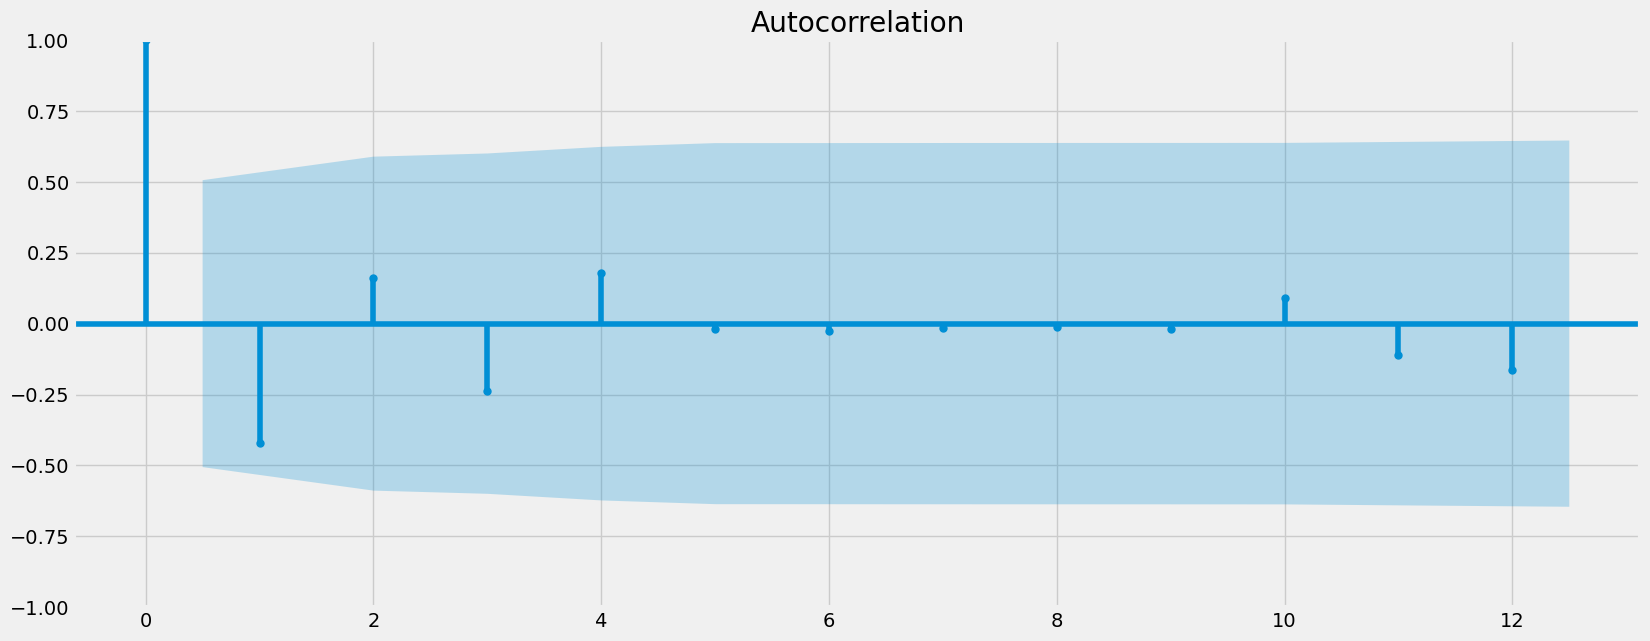

In [36]:
# Autocorrelations of the Dickey-Fuller Stationarity Test.

# Here, you import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(choc_result_log)
plt.show()

### 9. Check your data’s autocorrelations.

**All autocorrelations are below the dickey-fuller tests.**